Importamos las funciones de feature extraction

In [5]:
! git clone https://github.com/andresafanador/Functions.git
from Functions.feature_extraction1 import data

Cloning into 'Functions'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), 7.34 KiB | 1.47 MiB/s, done.


Importamos las funciones.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Leemos la base de datos.

In [3]:
!wget  https://github.com/SebastianVillega5/ProyectoIA/blob/346f5331fe3033a573a605d69c06b5b2c169330d/Machine%20learning%20PQ/Data%20Base/Normal1.zip?raw=true
!wget https://github.com/SebastianVillega5/ProyectoIA/blob/main/Machine%20learning%20PQ/Data%20Base/sag2.zip?raw=true
!wget https://github.com/andresafanador/IA/blob/c3070bdb5a11d6589adea01d3c2b4147e8f40cc1/Train/Normaltrain.zip?raw=true
!wget https://github.com/andresafanador/IA/blob/c3070bdb5a11d6589adea01d3c2b4147e8f40cc1/Train/sagtrain.zip?raw=true

! unzip /content/Normaltrain.zip?raw=true
Ntrain=pd.read_csv("Normaltrain.csv")

! unzip /content/sagtrain.zip?raw=true
Strain=pd.read_csv("sagtrain.csv")

! unzip /content/Normal1.zip?raw=true
Ntest=pd.read_csv("Normal1.csv")

! unzip /content/sag2.zip?raw=true
Stest=pd.read_csv("sag2.csv")

--2023-05-22 23:29:42--  https://github.com/SebastianVillega5/ProyectoIA/blob/346f5331fe3033a573a605d69c06b5b2c169330d/Machine%20learning%20PQ/Data%20Base/Normal1.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SebastianVillega5/ProyectoIA/raw/346f5331fe3033a573a605d69c06b5b2c169330d/Machine%20learning%20PQ/Data%20Base/Normal1.zip [following]
--2023-05-22 23:29:42--  https://github.com/SebastianVillega5/ProyectoIA/raw/346f5331fe3033a573a605d69c06b5b2c169330d/Machine%20learning%20PQ/Data%20Base/Normal1.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SebastianVillega5/ProyectoIA/346f5331fe3033a573a605d69c06b5b2c169330d/Machine%20learning%20PQ/Data%20Base/Normal1.zip [following]
--2023-05-22 23:29:42--  https://raw.githubusercontent

Probamos el metodo de regresion lineal.

In [6]:
xtrain,ytrain=data(Strain,Ntrain)
xtest,ytest=data(Stest,Ntest)

lr = LogisticRegression()
lr.fit(xtrain,ytrain)
print("Para logistic regression:")
print ("El desempeño con los datos de entrenamiento fue",lr.score(xtrain,ytrain))
print ("El desempeño con los datos de testeo fue",lr.score(xtest,ytest))
print("Para coeficiente de determinacion:",r2_score(ytest,lr.predict(xtest)))
print("Para el error absoluto medio:",median_absolute_error(ytest,lr.predict(xtest)))
print("Para el promedio del error cuadratico:",mean_squared_error(ytest,lr.predict(xtest)))

Para logistic regression:
El desempeño con los datos de entrenamiento fue 0.9789
El desempeño con los datos de testeo fue 0.9753
Para coeficiente de determinacion: 0.9012
Para el error absoluto medio: 0.0
Para el promedio del error cuadratico: 0.0247


Probamos con metodos no supervisados.

In [7]:
km = KMeans(n_clusters=2)
km.fit(xtest)
yclus = km.predict(xtest)
km.cluster_centers_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[6.72737460e-01, 1.67444563e-03, 0.00000000e+00, 3.78163994e+01,
        4.95183601e+02, 2.30095385e+00, 1.06741919e+00, 8.93053955e+00],
       [5.11651995e-01, 5.58533565e-03, 0.00000000e+00, 1.10176339e+02,
        4.22823661e+02, 1.13686867e+01, 1.06783619e+00, 6.88910680e+01]])

20000


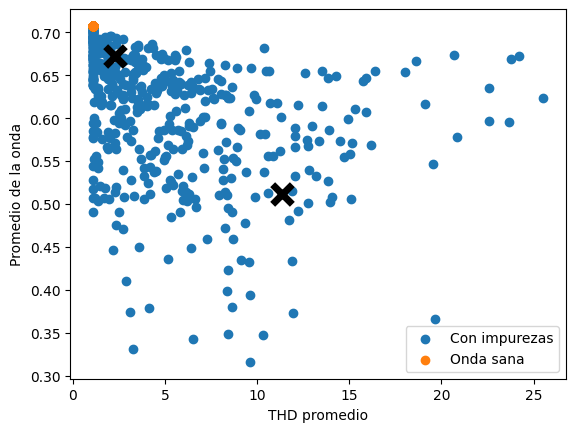

In [8]:

nxtest=np.array(xtest)
par=[]
impar=[]
print(np.shape(nxtest)[0])
for i in range(np.shape(nxtest)[0]):
  if i%2==0:
      par.append(list(nxtest[i,:]))
  else:
      impar.append(list(nxtest[i,:]))
par=np.array(par)
impar=np.array(impar)
plt.scatter(par[:500,5], par[:500,0],label="Con impurezas")
plt.scatter(impar[:500,5], impar[:500,0],label="Onda sana")
plt.legend()
plt.xlabel("THD promedio")
plt.ylabel("Promedio de la onda")
plt.scatter(km.cluster_centers_[0,5],km.cluster_centers_[0,0],label="Centroide 1",marker="x", lw=5, s=200, color="black")
plt.scatter(km.cluster_centers_[1,5],km.cluster_centers_[1,0],label="Centroide 2",marker="x", lw=5, s=200, color="black")

Por la imagen anterior nos dimos cuentas que teniamos un problema con la base de datos dado a que las ondas sanas nos daban practicamente los mismos valores y por ende decidimos graficar todas las ondas sanas. 

(533,)


Text(0, 0.5, 'A')

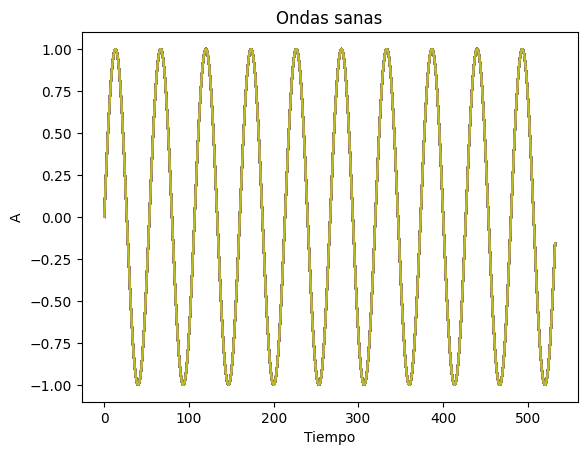

In [9]:
nNtest=np.array(Ntest)
print(np.shape(nNtest[:,1]))
for i in range(1,100,1):
  plt.plot(nNtest[:,i])
plt.title("Ondas sanas")
plt.xlabel("Tiempo")
plt.ylabel("A")